In [3]:
import pandas as pd
import psycopg2 as pg2

# Import SQL Alchemy
from sqlalchemy import create_engine

# Import and establish Base for which classes will be constructed 
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

# Import modules to declare columns and column data types
from sqlalchemy import Column, Integer, String, Float

In [2]:
#conn = pg2.connect(database='employeeSQL',user='postgres', password='46..')

In [5]:
# Create a connection to database
# Import the SQL database into Pandas
conn = pg2.connect(
                    database = "employeeSQL",
                    user = "postgres",
                    password = "4658jK0L",
                    host = "localhost",
                    port = "5432"
                    )

In [6]:
# Query All Records in the the Database
salary_df = pd.read_sql("SELECT * FROM salaries", conn)
salary_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [10]:
print(salary_df['salary'].min())
print(salary_df['salary'].max())

salary_df.emp_no.count()

40000
129492


300023

In [14]:
import matplotlib.pyplot as plt

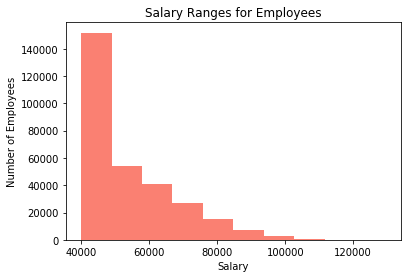

In [15]:
# Create a histogram to visualize the most common salary ranges for employees.
x = salary_df['salary']

plt.hist(x, bins = 10, color = 'salmon')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.title('Salary Ranges for Employees')

plt.show()

In [11]:
#-----Query 'titles' records from 'employeeSQL' database
title_df = pd.read_sql("SELECT * FROM titles", conn)
#title_df.head()
#-----Query 'employees' records from 'employeeSQL' database
emp_df = pd.read_sql("SELECT emp_no, emp_title_id FROM employees", conn)
#emp_df.head()
#-----Query 'salaries' records from 'employeeSQL' database
salary_df = pd.read_sql("SELECT * FROM salaries", conn)
#salary_df.head()

In [ ]:
query = '''
SELECT title, salary
FROM titles t
JOIN employees e
on t.title_id = e.emp_title_id
JOIN salaries s
on e.emp_no = s.emp_no
GROUP BY title
'''
title_salary_df = pd.read_sql(query, conn)
# I keep getting an error of title_id does not exist. 

In [ ]:
# Create a bar chart of average salary by title.
# group by average salary and then barplot the output. 
ax = round(title_salary_df.groupby(['title'])['salaries'].mean(),2).plot.bar()
plt.ylabel("Average Salaries")
plt.xlabel("Title")
plt.title("Average Salaries by Titles")
#plt.tight_layout()
plt.show()